## **Name:** Affan Zulfiqar
---
## **Reg No:** B22F0144AI050
---
## **Course:** ANN LAB (6)
---
## **Section:** AI22F-Blue


## **Lab Task**
1. Use CIFAR-10 dataset.
2. Build simple ANN model and use suitable activation function for each initilizer(He, Lecun, Xavier).
3. Train model for each initilizer seperately.
4. Visualize the results for each initilizer seperately.
5. Compare the results of all initilizers by using grap
**Note:**
* 3 models with separate accuracy and comparison

* Different Data set

**Import Libraries**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, initializers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

**Preprocessing**

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


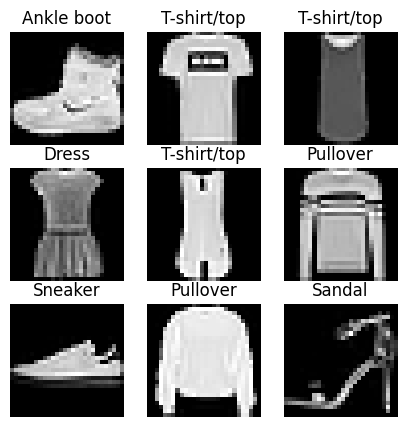

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Display some sample images
plt.figure(figsize=(5, 5))
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

**ANN Model**

In [3]:
def create_ann_model(initializer=None, activation=None):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))

    # Add dense layers
    model.add(layers.Dense(512, kernel_initializer=initializer, activation=activation))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(256, kernel_initializer=initializer, activation=activation))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(128, kernel_initializer=initializer, activation=activation))
    model.add(layers.Dropout(0.2))

    # Output layer with softmax activation for 10 classes
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

**Model with He initializer**

In [4]:
he_initializer = tf.keras.initializers.HeNormal()
he_activation = 'relu'

print("Training model with He initialization and ReLU activation...")
he_model = create_ann_model(initializer=he_initializer, activation=he_activation)

# Store history for plotting later
he_history = he_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
he_test_loss, he_test_acc = he_model.evaluate(X_test, y_test, verbose=2)
print(f"He initializer Test accuracy: {he_test_acc:.4f}")

# Extract training and validation metrics
he_train_loss = he_history.history['loss']
he_train_acc = he_history.history['accuracy']
he_val_loss = he_history.history['val_loss']
he_val_acc = he_history.history['val_accuracy']

Training model with He initialization and ReLU activation...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7054 - loss: 0.8338 - val_accuracy: 0.8504 - val_loss: 0.4155
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8455 - loss: 0.4323 - val_accuracy: 0.8635 - val_loss: 0.3812
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8568 - loss: 0.3880 - val_accuracy: 0.8638 - val_loss: 0.3623
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8730 - loss: 0.3531 - val_accuracy: 0.8688 - val_loss: 0.3671
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8724 - loss: 0.3450 - val_accuracy: 0.8813 - val_loss: 0.3305
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8811 - loss: 0.3230 - val_accuracy: 0.8797 - val_loss: 0.3294
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8839 - loss: 0.3109 - val_accuracy: 0.8860 - val_loss: 0.3197
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8898 - loss: 0.2985 - val_

**Visualization of He Initialization:**

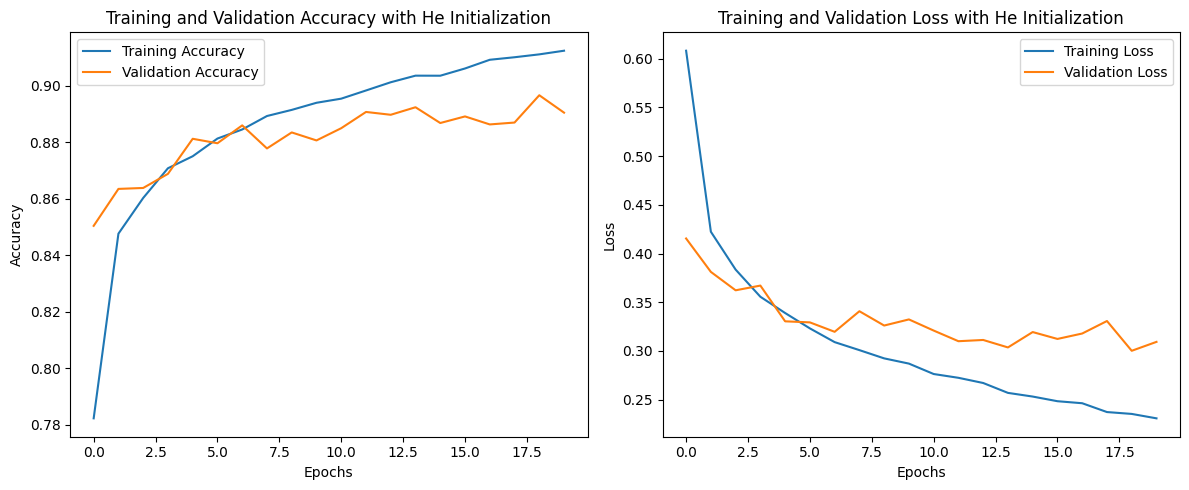

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(he_train_acc, label='Training Accuracy')
plt.plot(he_val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy with He Initialization')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(he_train_loss, label='Training Loss')
plt.plot(he_val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss with He Initialization')

plt.tight_layout()
plt.show()


**Model with Xavier/Glorot initializer**

In [5]:
xavier_initializer = tf.keras.initializers.GlorotNormal()
xavier_activation = 'tanh'

print("Training model with Xavier/Glorot initialization and tanh activation...")
xavier_model = create_ann_model(initializer=xavier_initializer, activation=xavier_activation)

# Store history for plotting later
xavier_history = xavier_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
xavier_test_loss, xavier_test_acc = xavier_model.evaluate(X_test, y_test, verbose=2)
print(f"Xavier initializer Test accuracy: {xavier_test_acc:.4f}")

# Extract training and validation metrics
xavier_train_loss = xavier_history.history['loss']
xavier_train_acc = xavier_history.history['accuracy']
xavier_val_loss = xavier_history.history['val_loss']
xavier_val_acc = xavier_history.history['val_accuracy']

Training model with Xavier/Glorot initialization and tanh activation...
Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.7338 - loss: 0.7232 - val_accuracy: 0.8494 - val_loss: 0.4221
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8414 - loss: 0.4454 - val_accuracy: 0.8534 - val_loss: 0.4101
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8524 - loss: 0.4122 - val_accuracy: 0.8600 - val_loss: 0.3880
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8643 - loss: 0.3718 - val_accuracy: 0.8709 - val_loss: 0.3513
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8681 - loss: 0.3604 - val_accuracy: 0.8744 - val_loss: 0.3504
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8739 - loss: 0.3449 - val_accuracy: 0.8732 - val_loss: 0.3378
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8777 - loss: 0.3341 - val_accuracy: 0.8746 - val_loss: 0.3477
Epoch 8/20
375/375 ━━━━

**Visualization of Xavier:**

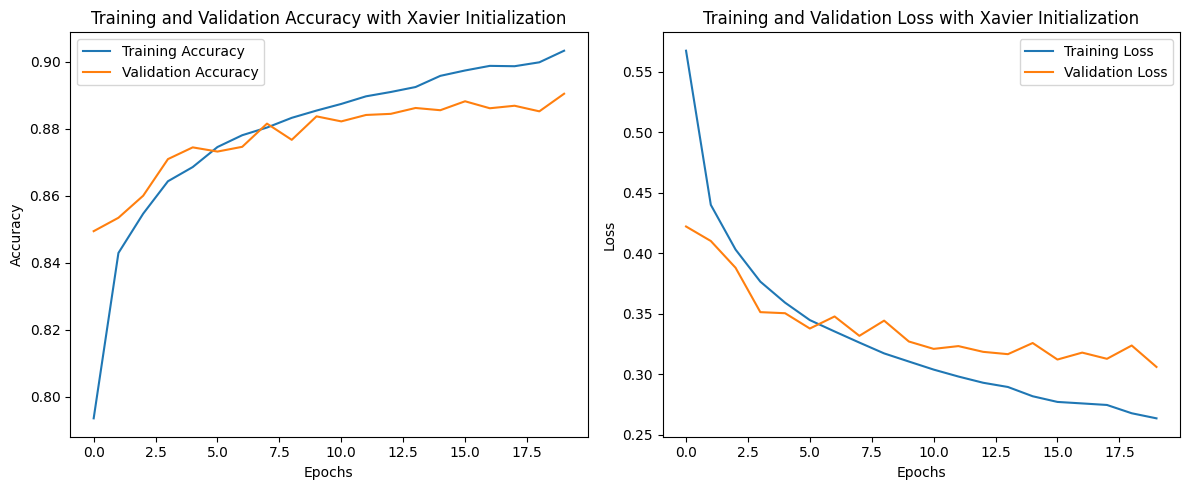

In [16]:
plt.subplot(1, 2, 1)
plt.plot(xavier_train_acc, label='Training Accuracy')
plt.plot(xavier_val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy with Xavier Initialization')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(xavier_train_loss, label='Training Loss')
plt.plot(xavier_val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss with Xavier Initialization')

plt.tight_layout()
plt.show()

**Model with LeCun initializer**

In [6]:
# Create and train model with LeCun initializer
lecun_initializer = tf.keras.initializers.LecunNormal()
lecun_activation = 'selu'

print("Training model with LeCun initialization and SELU activation...")
lecun_model = create_ann_model(initializer=lecun_initializer, activation=lecun_activation)

# Store history for plotting later
lecun_history = lecun_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

lecun_test_loss, lecun_test_acc = lecun_model.evaluate(X_test, y_test, verbose=2)
print(f"LeCun initializer Test accuracy: {lecun_test_acc:.4f}")

lecun_train_loss = lecun_history.history['loss']
lecun_train_acc = lecun_history.history['accuracy']
lecun_val_loss = lecun_history.history['val_loss']
lecun_val_acc = lecun_history.history['val_accuracy']

Training model with LeCun initialization and SELU activation...
Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.7197 - loss: 0.8225 - val_accuracy: 0.8272 - val_loss: 0.4809
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8187 - loss: 0.5022 - val_accuracy: 0.8332 - val_loss: 0.4670
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.8404 - loss: 0.4464 - val_accuracy: 0.8559 - val_loss: 0.3863
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8536 - loss: 0.4028 - val_accuracy: 0.8644 - val_loss: 0.3683
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8599 - loss: 0.3837 - val_accuracy: 0.8688 - val_loss: 0.3533
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8626 - loss: 0.3645 - val_accuracy: 0.8704 - val_loss: 0.3590
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8657 - loss: 0.3535 - val_accuracy: 0.8793 - val_loss: 0.3370
Epoch 8/20
375/375 ━━━━━━━━━━━━

**Visualization of Lecun Initialization:**

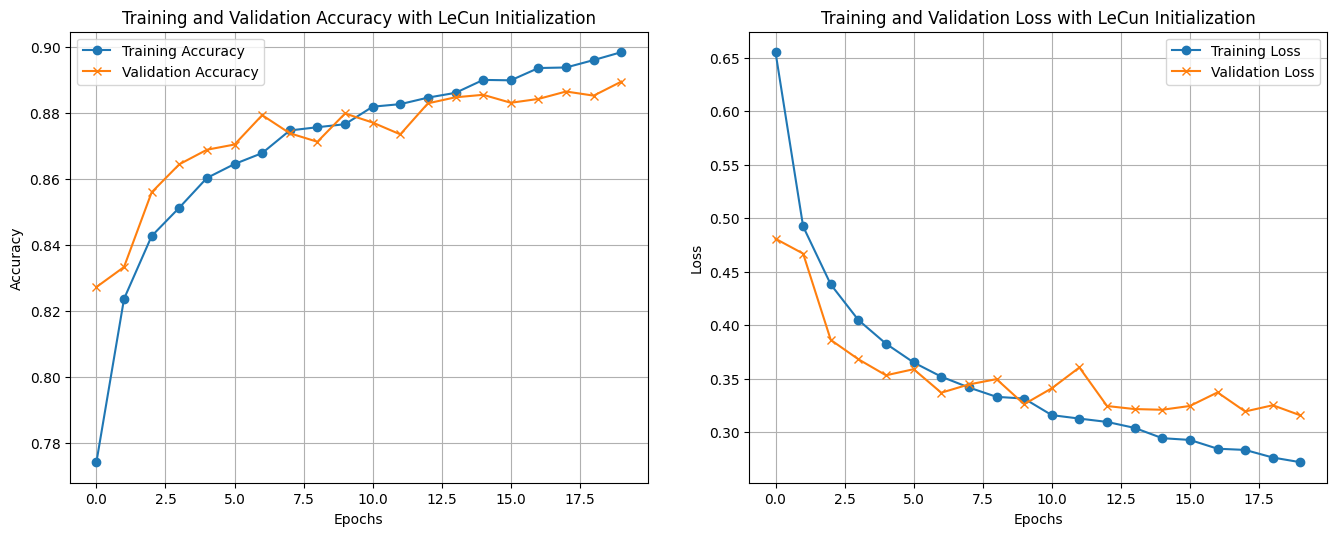

In [18]:
plt.subplot(1, 2, 1)
plt.plot(lecun_train_acc, label='Training Accuracy', marker='o')
plt.plot(lecun_val_acc, label='Validation Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Accuracy with LeCun Initialization')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(lecun_train_loss, label='Training Loss', marker='o')
plt.plot(lecun_val_loss, label='Validation Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss with LeCun Initialization')

plt.tight_layout(pad=3.0)
plt.show()

**Camparison from Graph:**

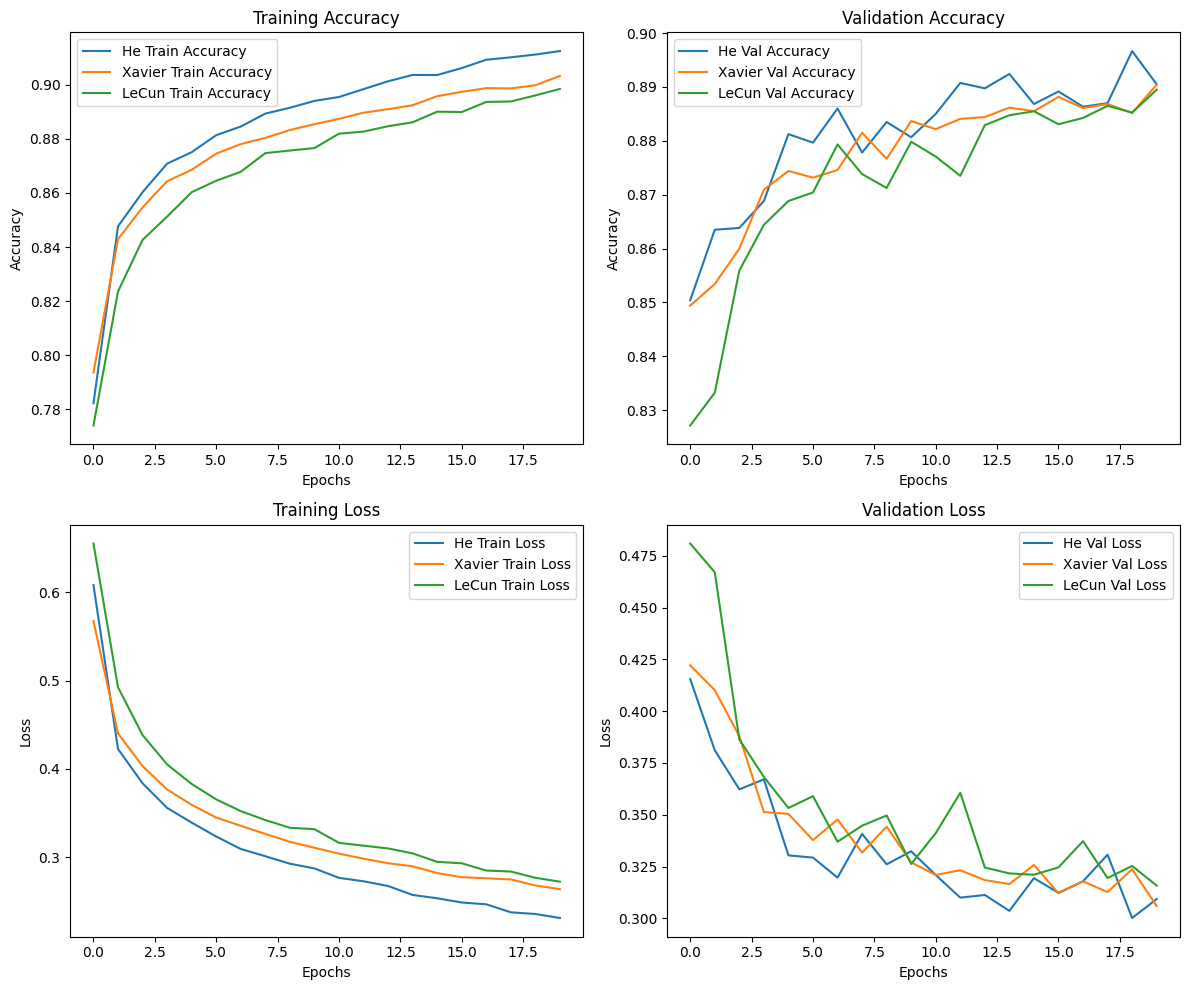

In [9]:
plt.figure(figsize=(12, 10))

# Training Accuracy and Validation Accuracy side by side
plt.subplot(2, 2, 1)
plt.plot(he_train_acc, label='He Train Accuracy')
plt.plot(xavier_train_acc, label='Xavier Train Accuracy')
plt.plot(lecun_train_acc, label='LeCun Train Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(he_val_acc, label='He Val Accuracy')
plt.plot(xavier_val_acc, label='Xavier Val Accuracy')
plt.plot(lecun_val_acc, label='LeCun Val Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training Loss and Validation Loss side by side
plt.subplot(2, 2, 3)
plt.plot(he_train_loss, label='He Train Loss')
plt.plot(xavier_train_loss, label='Xavier Train Loss')
plt.plot(lecun_train_loss, label='LeCun Train Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(he_val_loss, label='He Val Loss')
plt.plot(xavier_val_loss, label='Xavier Val Loss')
plt.plot(lecun_val_loss, label='LeCun Val Loss')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**Comparison from Histogram:**

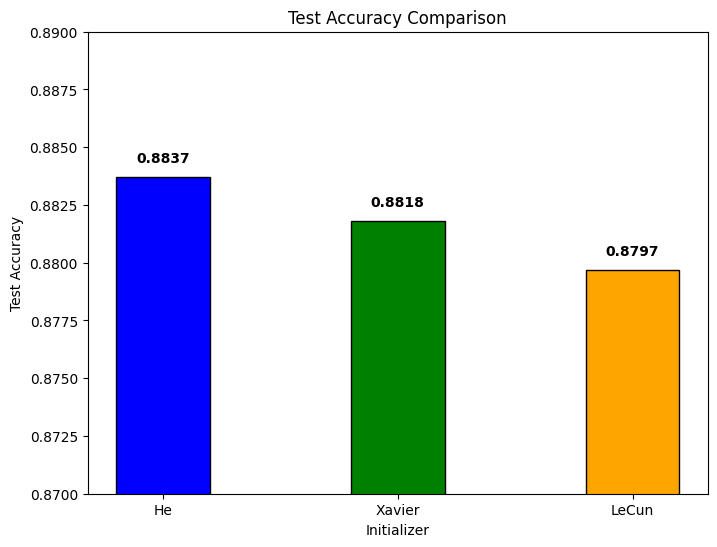

In [13]:
initializers = ['He', 'Xavier', 'LeCun']
test_accuracies = [he_test_acc, xavier_test_acc, lecun_test_acc]

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'orange']
plt.bar(initializers, test_accuracies, color=colors, width=0.4, edgecolor='black')
plt.title('Test Accuracy Comparison')
plt.xlabel('Initializer')
plt.ylabel('Test Accuracy')
plt.ylim(0.87, 0.89)  # Zooming in to show closer differences

for i, v in enumerate(test_accuracies):
    plt.text(i, v + 0.0005, f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

**Conclusion:**

* In this lab, I compared the impact of different weight initializers and activation functions on the performance of an Artificial Neural Network (ANN). The initializers tested were He (ReLU), Xavier (Tanh), and LeCun (SELU).

* The results indicated that He Initialization with ReLU activation achieved the highest accuracy (88.37%), showing strong performance and effective weight distribution. Xavier Initialization with Tanh activation closely followed with 88.18% accuracy, reflecting decent performance and stable learning. LeCun Initialization with SELU activation achieved an accuracy of 87.97%, performing slightly lower but still demonstrating reasonable stability.

* Overall, He Initialization with ReLU proved to be the most effective for this dataset, providing the best accuracy and good performance for training deep neural networks but the difference was very slightly.